# 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler , PowerTransformer , RobustScaler 
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from  factor_analyzer import FactorAnalyzer as FA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity  # 用于Bartlett's球状检验
from factor_analyzer.factor_analyzer import calculate_kmo  # 用于KMO检验

from lazypredict.Supervised import LazyClassifier

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者 'PingFang SC'
plt.rcParams['axes.unicode_minus'] = False

# 数据读取

In [3]:
data = pd.read_csv('train_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1700 non-null   float64
 1   Attrition                 1700 non-null   int64  
 2   BusinessTravel            1700 non-null   float64
 3   DailyRate                 1700 non-null   float64
 4   Department                1700 non-null   float64
 5   DistanceFromHome          1700 non-null   float64
 6   Education                 1700 non-null   float64
 7   EducationField            1700 non-null   float64
 8   EmployeeCount             1700 non-null   float64
 9   EmployeeNumber            1700 non-null   float64
 10  EnvironmentSatisfaction   1700 non-null   float64
 11  Gender                    1700 non-null   float64
 12  HourlyRate                1700 non-null   float64
 13  JobInvolvement            1700 non-null   float64
 14  JobLevel

## 特征信息

<font size=5>基础信息列</font>

- Age

    - 员工年龄（数值型）

- Attrition

    - 是否离职（二分类变量）

    - 0 = 未离职，1 = 已离职（目标变量）

- BusinessTravel

    - 出差频率（分类变量，数值编码）

    - 常见编码：0=不出差，1=偶尔出差，2=频繁出差

<font size=5>薪酬与工作条件</font>

- DailyRate

    - 日薪或每日费用（数值型，需确认单位）

- HourlyRate

    - 时薪（数值型）

- MonthlyIncome

    - 月收入（数值型，关键经济指标）

- MonthlyRate

    - 月费率（可能指公司成本或员工薪资结构）

- PercentSalaryHike

    - 薪资涨幅百分比（数值型，如11表示11%）

<font size=5>岗位与部门信息</font>

- Department

    - 所属部门（分类变量，数值编码）

    - 常见编码：1=研发，2=销售，3=人力资源等（需结合数据字典）

- JobRole

    - 具体职位（分类变量，数值编码，如6可能代表“销售主管”）

- JobLevel

    - 职级（数值型，如2=中级）

- StandardHours

    - 标准工时（固定值80，冗余列，可忽略）

<font size=5>个人背景与满意度</font>

- Education

    - 教育水平（分类变量，数值编码）

    - 通常：1=高中，2=学士，3=硕士，4=博士等

- EducationField

    - 教育领域（分类变量，数值编码，如1=技术，3=人力资源等）

- Gender

    - 性别（二分类变量，0=女，1=男）

- MaritalStatus

    - 婚姻状况（分类变量，数值编码）

    - 常见：0=单身，1=已婚，2=离异

<font size=5>工作经历与稳定性</font>

- NumCompaniesWorked

    - 曾任职公司数量（数值型）

- TotalWorkingYears

    - 总工作年限（数值型）

- YearsAtCompany

    - 在当前公司工作年数（数值型）

- YearsInCurrentRole

    - 在当前职位工作年数（数值型）

- YearsSinceLastPromotion

    - 距离上次晋升的年数（数值型，关键离职风险指标）

- YearsWithCurrManager

    - 与当前直属上级共事年数（数值型）

<font size=5>满意度与绩效</font>

- EnvironmentSatisfaction

    - 工作环境满意度（分类变量，数值编码，1=低，4=高）

- JobSatisfaction

    - 工作满意度（同上）

- RelationshipSatisfaction

    - 同事关系满意度（同上）

- WorkLifeBalance

    - 工作生活平衡满意度（同上）

- PerformanceRating

    - 绩效评分（数值型，如3=中等）

<font size=5>其他辅助列</font>

- DistanceFromHome

    - 家庭到公司距离（数值型，单位可能是公里/英里）

- EmployeeNumber

    - 员工编号（唯一标识符，无分析意义）

- EmployeeCount

    - 员工计数列

    - 固定值1（冗余列，可忽略）

- Over18

    - 是否成年（固定值0，冗余列）

- OverTime

    - 是否加班（二分类变量，0=否，1=是）

- StockOptionLevel

    - 股票期权等级（数值型，0=无，1=低等）

- TrainingTimesLastYear

    - 去年参加培训次数（数值型）

In [4]:
# 去除固定数值的冗余列
data.drop(axis=1, labels=['Over18','EmployeeCount','EmployeeNumber','StandardHours'],inplace=True)

In [5]:
data.columns, len(data.columns)

(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 31)

续聚类分析，删去对离职不敏感的特征

    JobInvolvement,Department,EducationField,Gender,BusinessTravel,Education,WorkLifeBalance,PerformanceRating

In [6]:
drop_cols = ['JobInvolvement','Department','EducationField','Gender','BusinessTravel','Education','WorkLifeBalance','PerformanceRating']
data.drop(labels=drop_cols, axis=1, inplace=True)

In [7]:
categorical_feature = ['Attrition','JobRole','JobLevel','MaritalStatus','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','OverTime','StockOptionLevel']
numerical_feature = [col for col in data.columns if col not in categorical_feature]
len(categorical_feature), len(numerical_feature)

(9, 14)

In [8]:
discrete_feature    = [col for col in numerical_feature if len(data[col].unique()) < 25]
continuous_feature  = [col for col in numerical_feature if col not in discrete_feature]
len(discrete_feature), len(continuous_feature)

(6, 8)

In [9]:
# 名义变量中去掉目标变量 Attrition
nominal_feature = ['JobRole','MaritalStatus','OverTime']

ordinal_feature = ['JobLevel','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel']

len(categorical_feature), len(nominal_feature), len(ordinal_feature)

(9, 3, 5)

# EDA

## kda

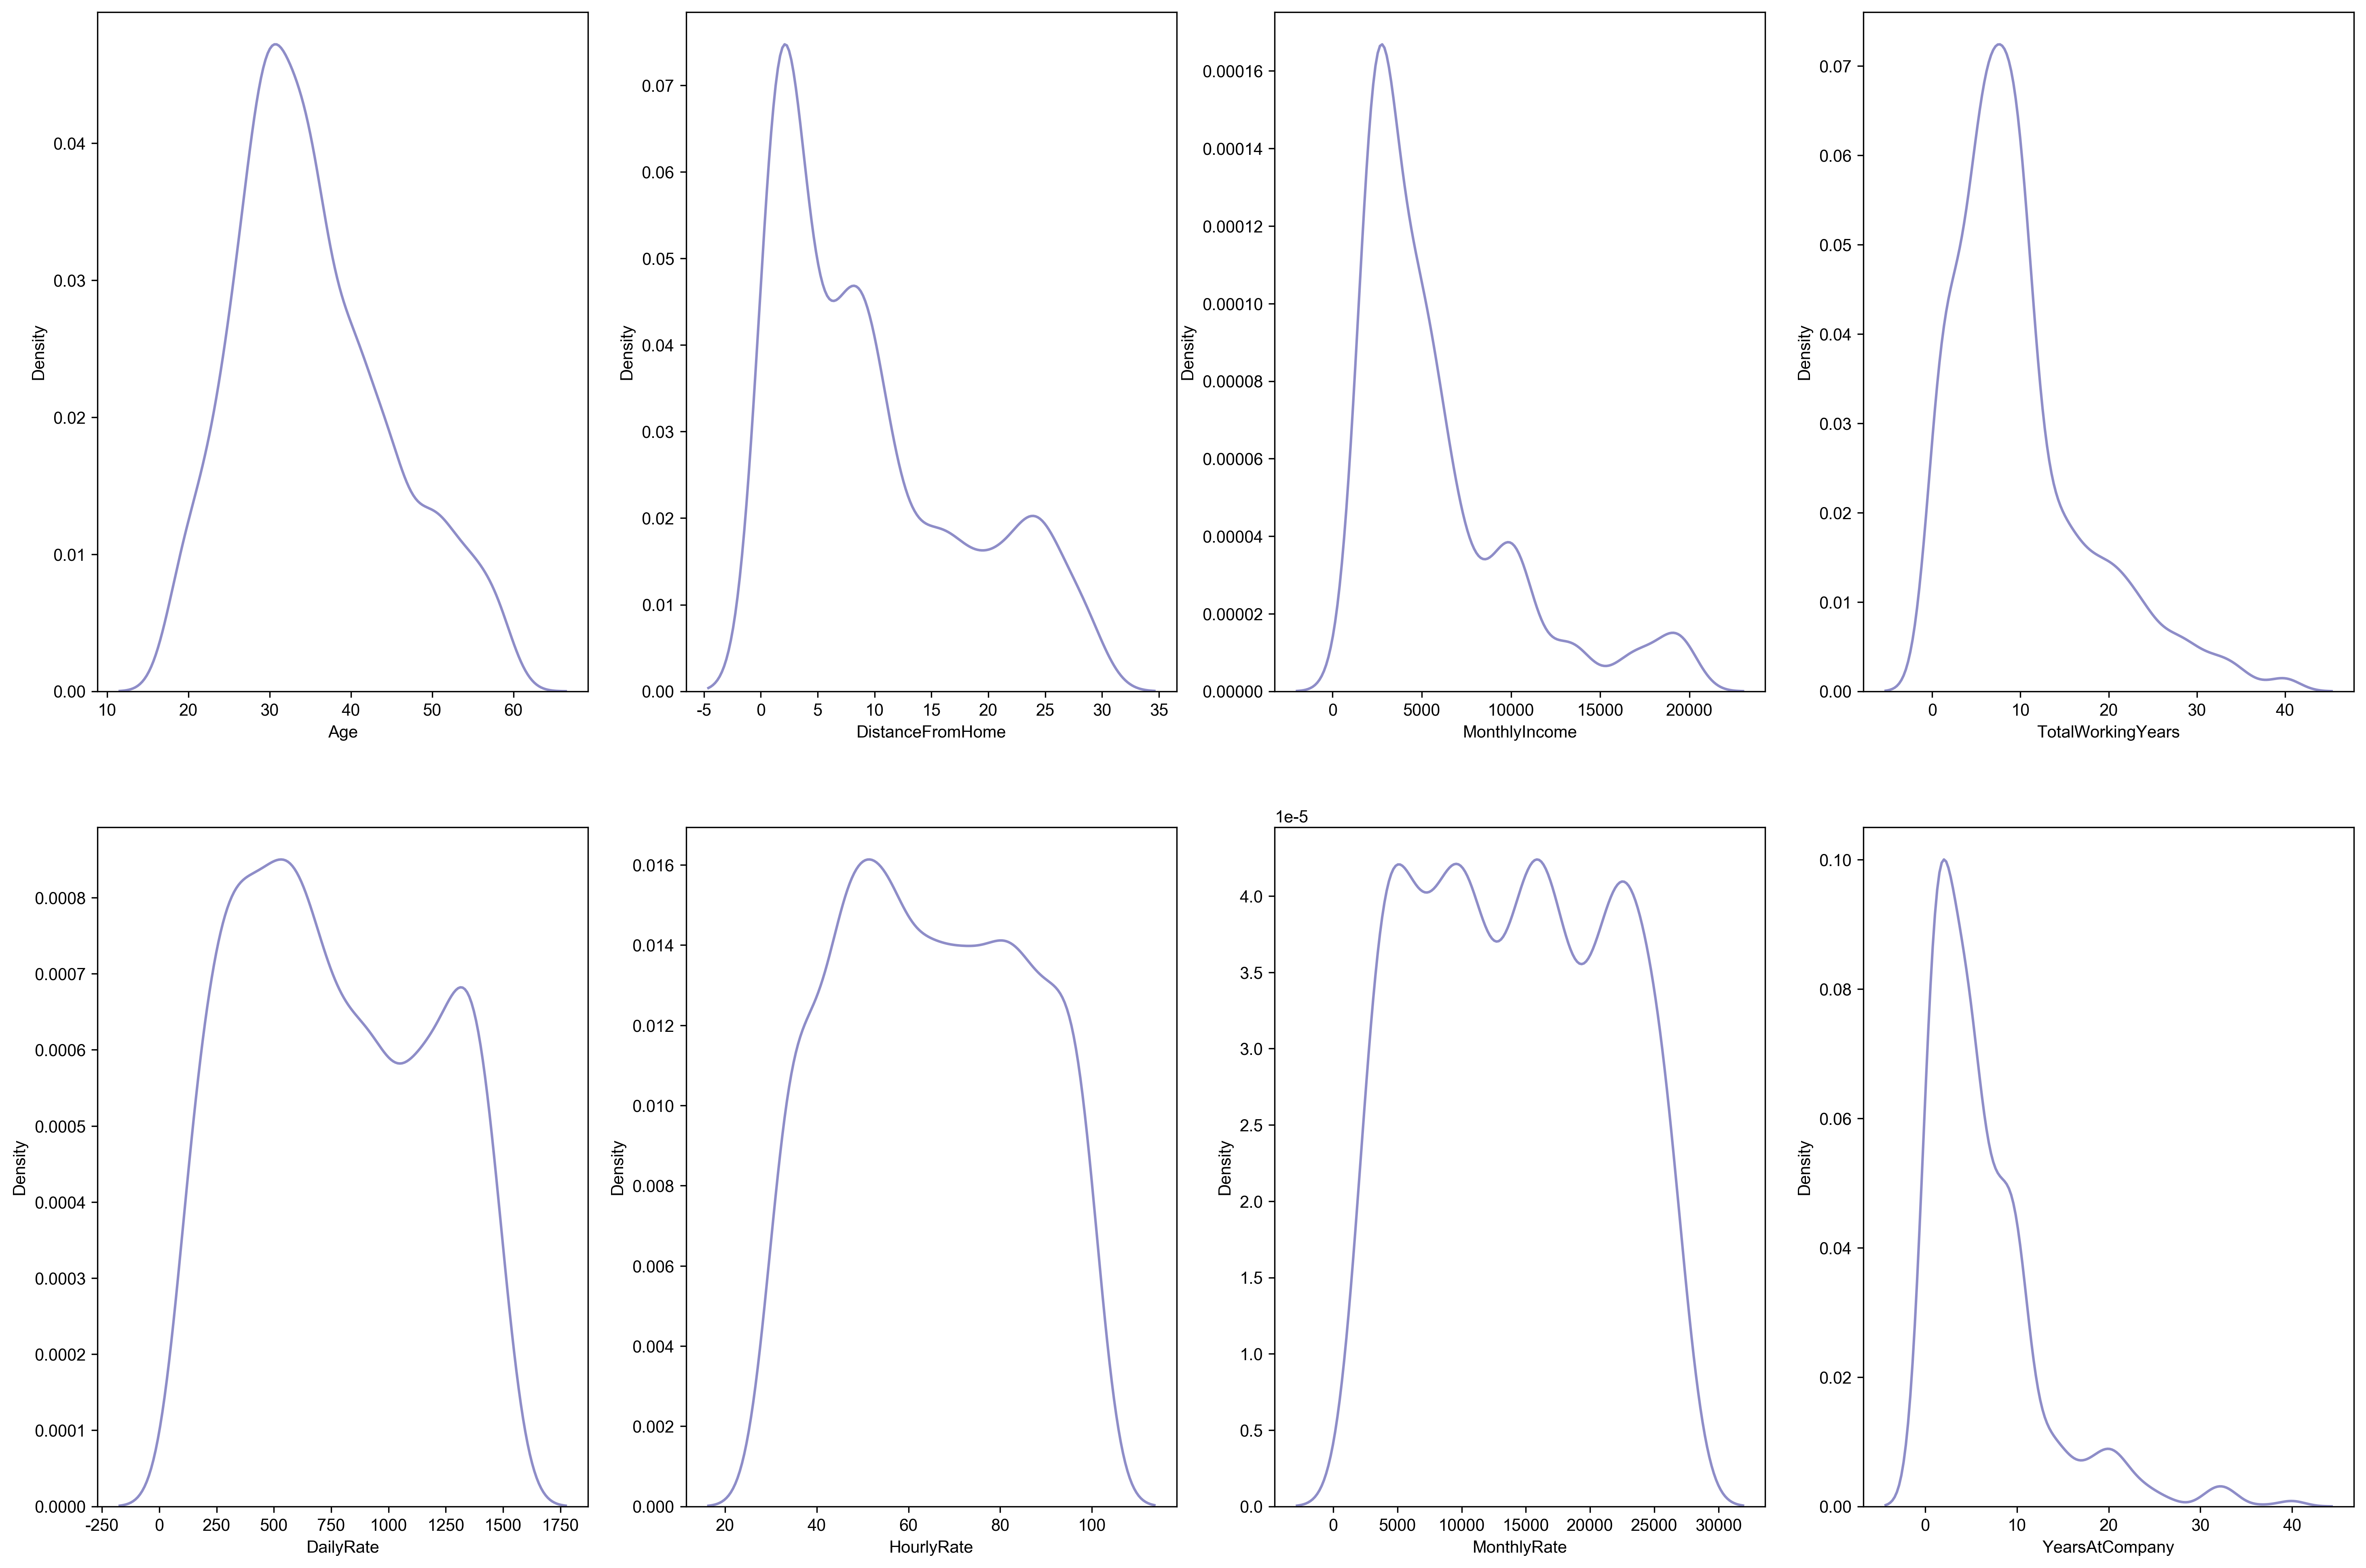

In [10]:
# 连续型变量的核密度图
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 16), dpi=300)

for i,feature in enumerate(continuous_feature):
    sns.kdeplot(data=data, x=feature, ax=axes[i%2,i//2], color=[142/255,141/255,200/255])

核密度图类似正态分布

## 散点图

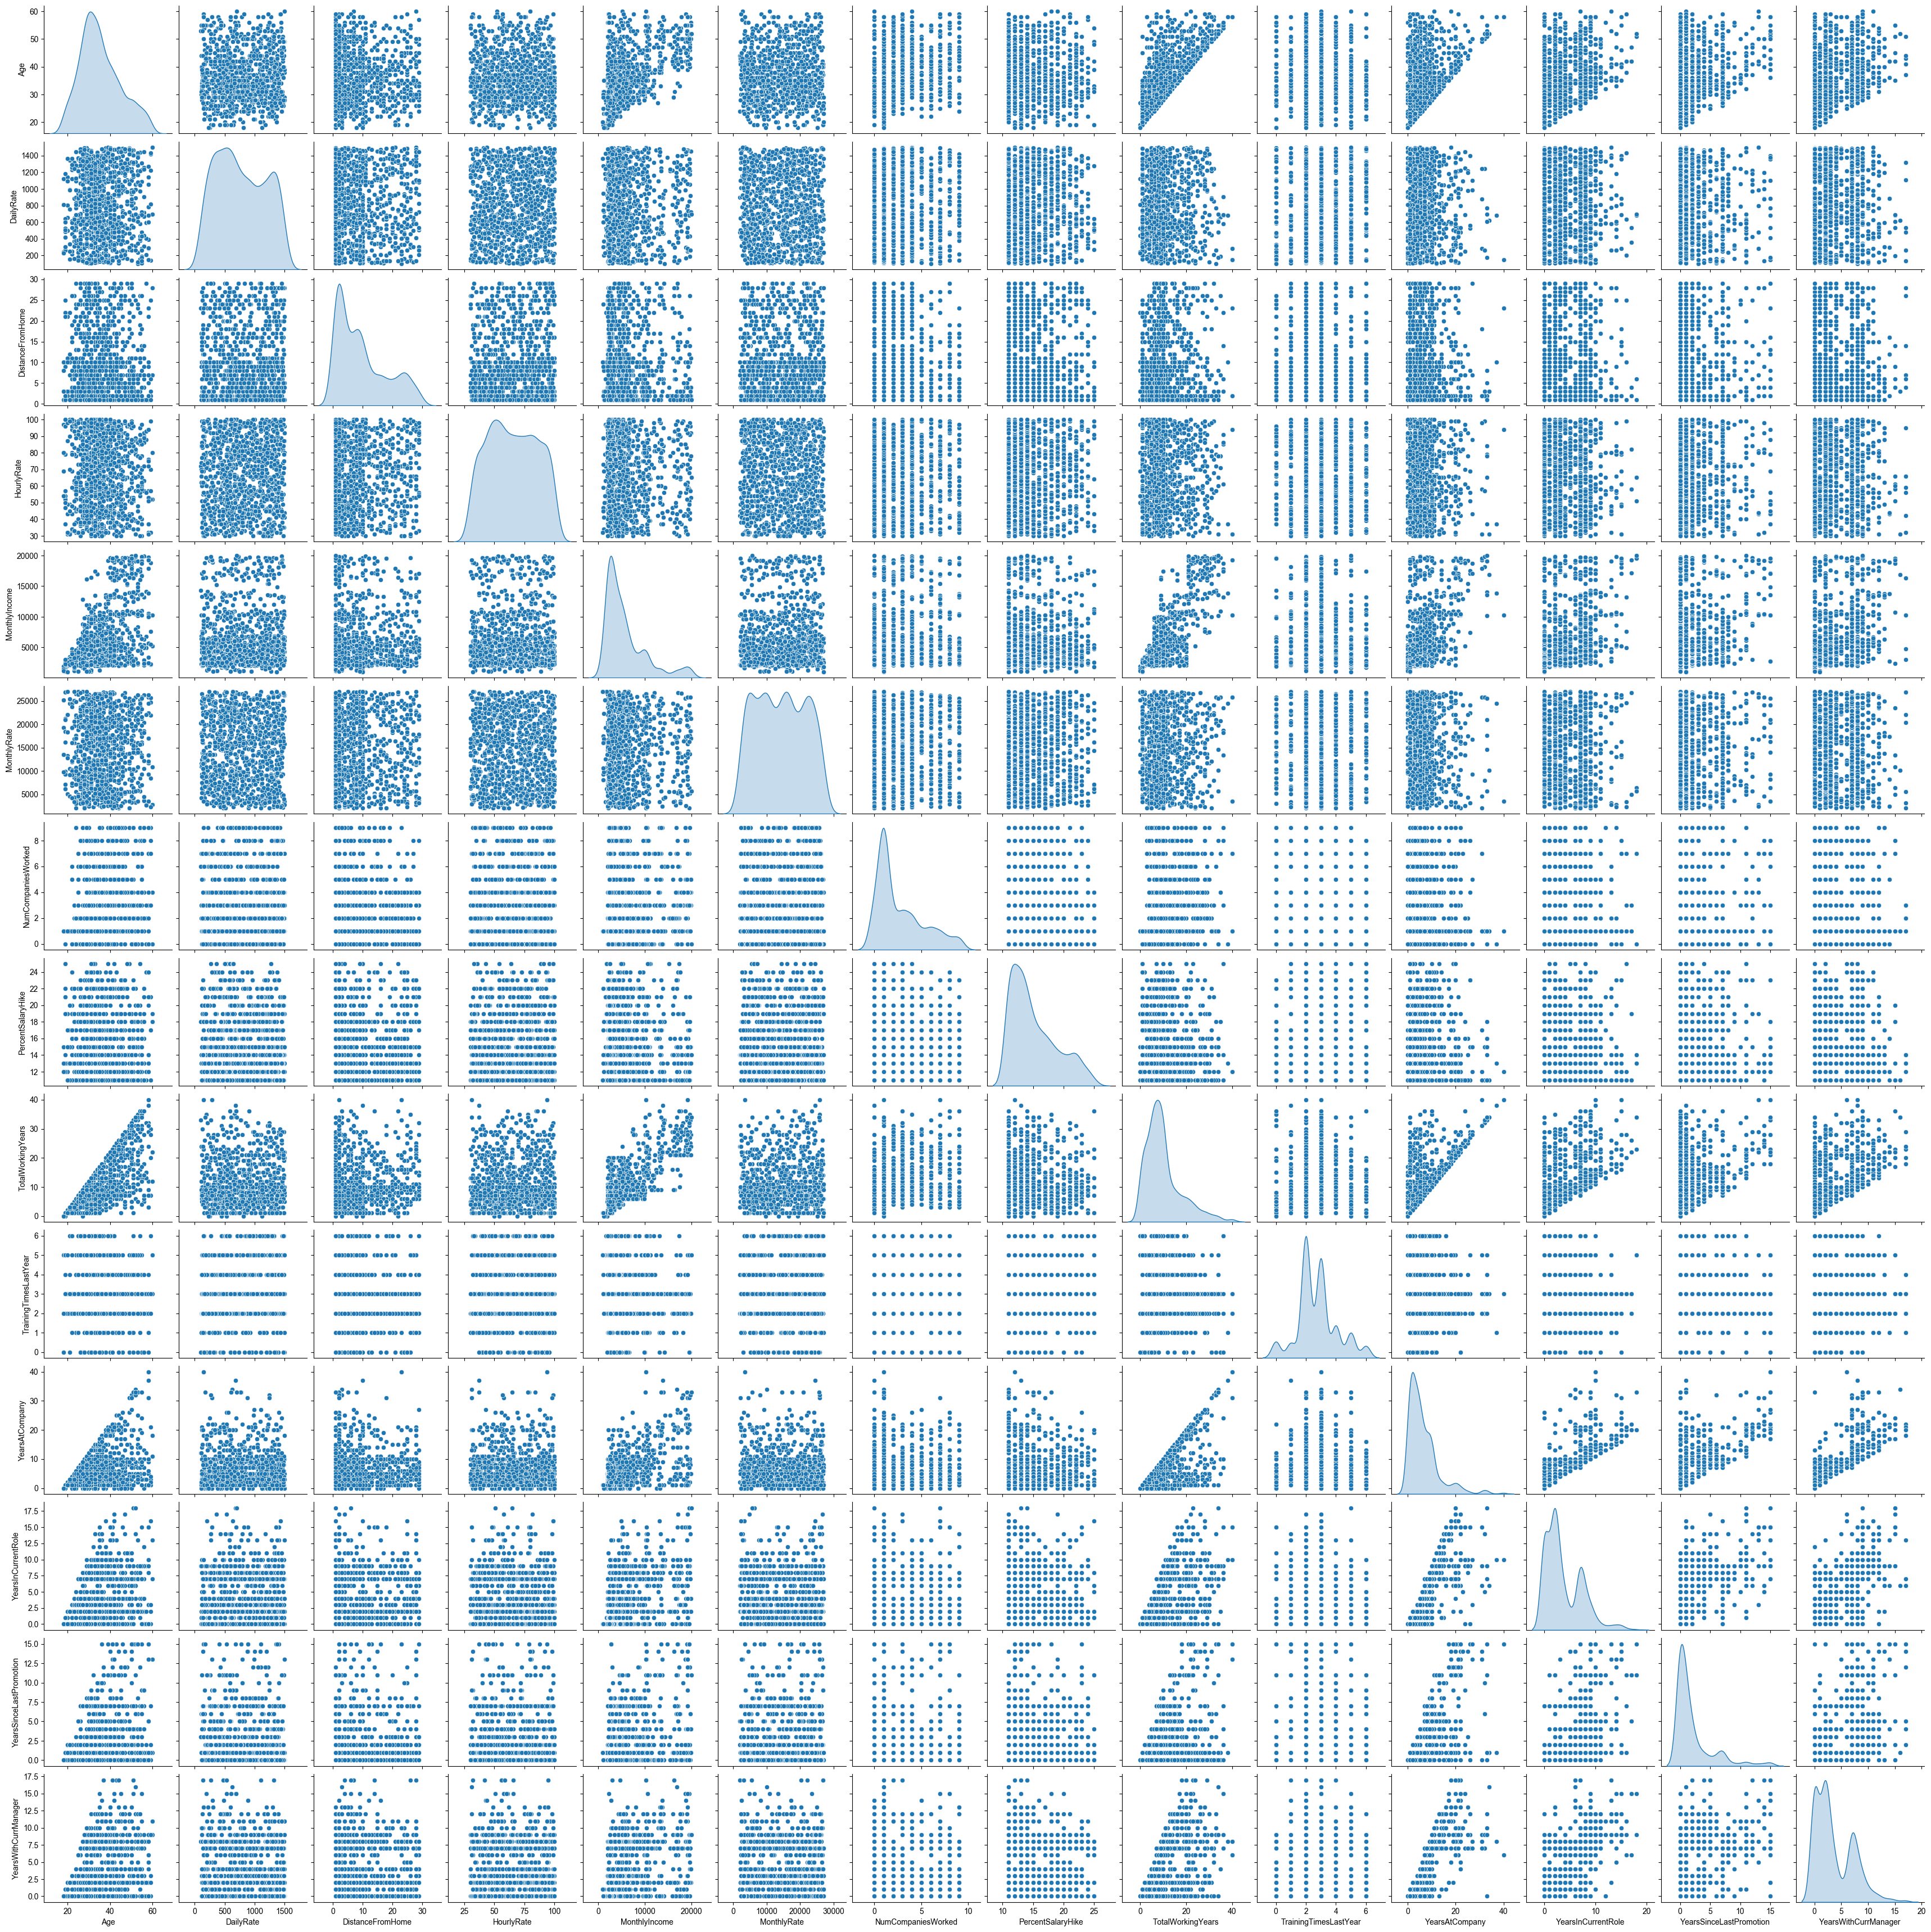

In [11]:
# 数值型变量 两两之间的散点图
sns.pairplot(data[numerical_feature],diag_kind='kde')

    NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear

这三个变量的散点图分布太过均匀，可能与其他变量的相关性较弱

## 箱线图

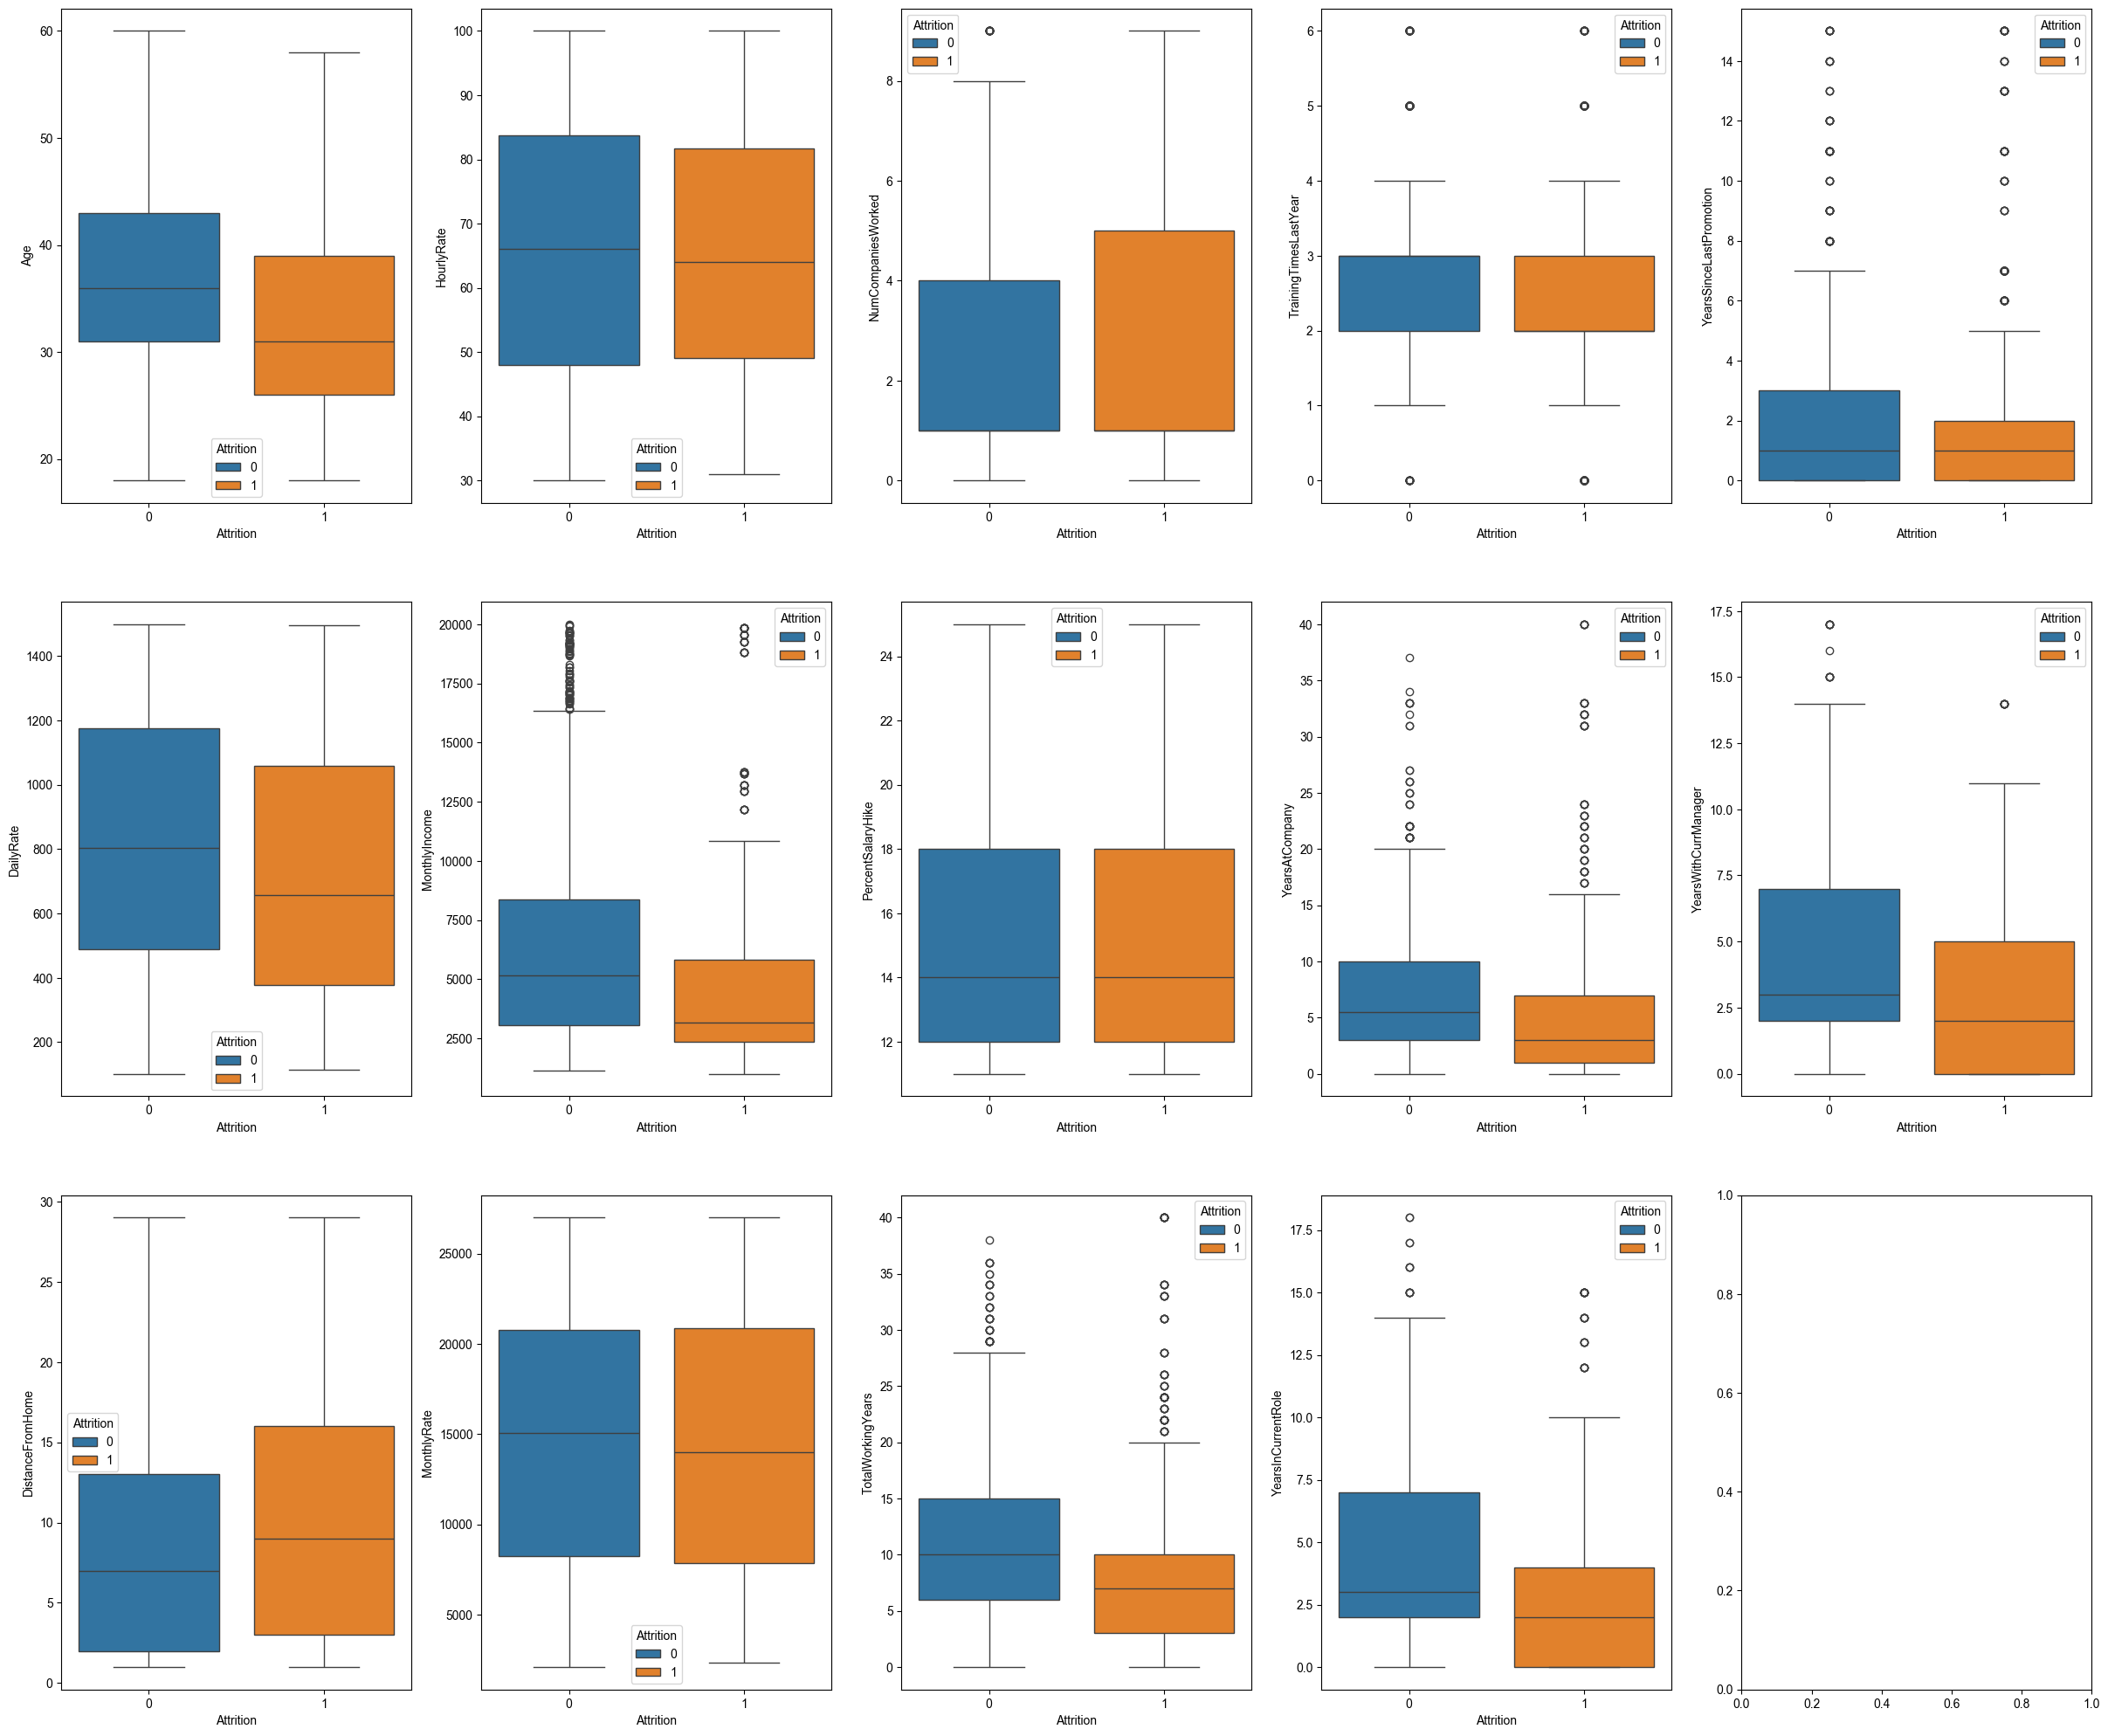

In [12]:
fig , axes = plt.subplots(nrows=3, ncols=5, figsize=(30,25))

for i , feature in enumerate(numerical_feature):
    sns.boxplot(x='Attrition', y=feature, hue='Attrition' ,data=data ,ax= axes[i%3, i//3])

plt.show()

由箱线图可见，TrainingTimesLastYear 变量在离职与未离职的两个群体中的箱体十分类似，可认为其分布近似，故考虑删去这个特征

In [13]:
drop_features = ['TrainingTimesLastYear', 'NumCompaniesWorked','PercentSalaryHike']
numerical_feature = [col for col in numerical_feature if col not in drop_features]

## 直方图

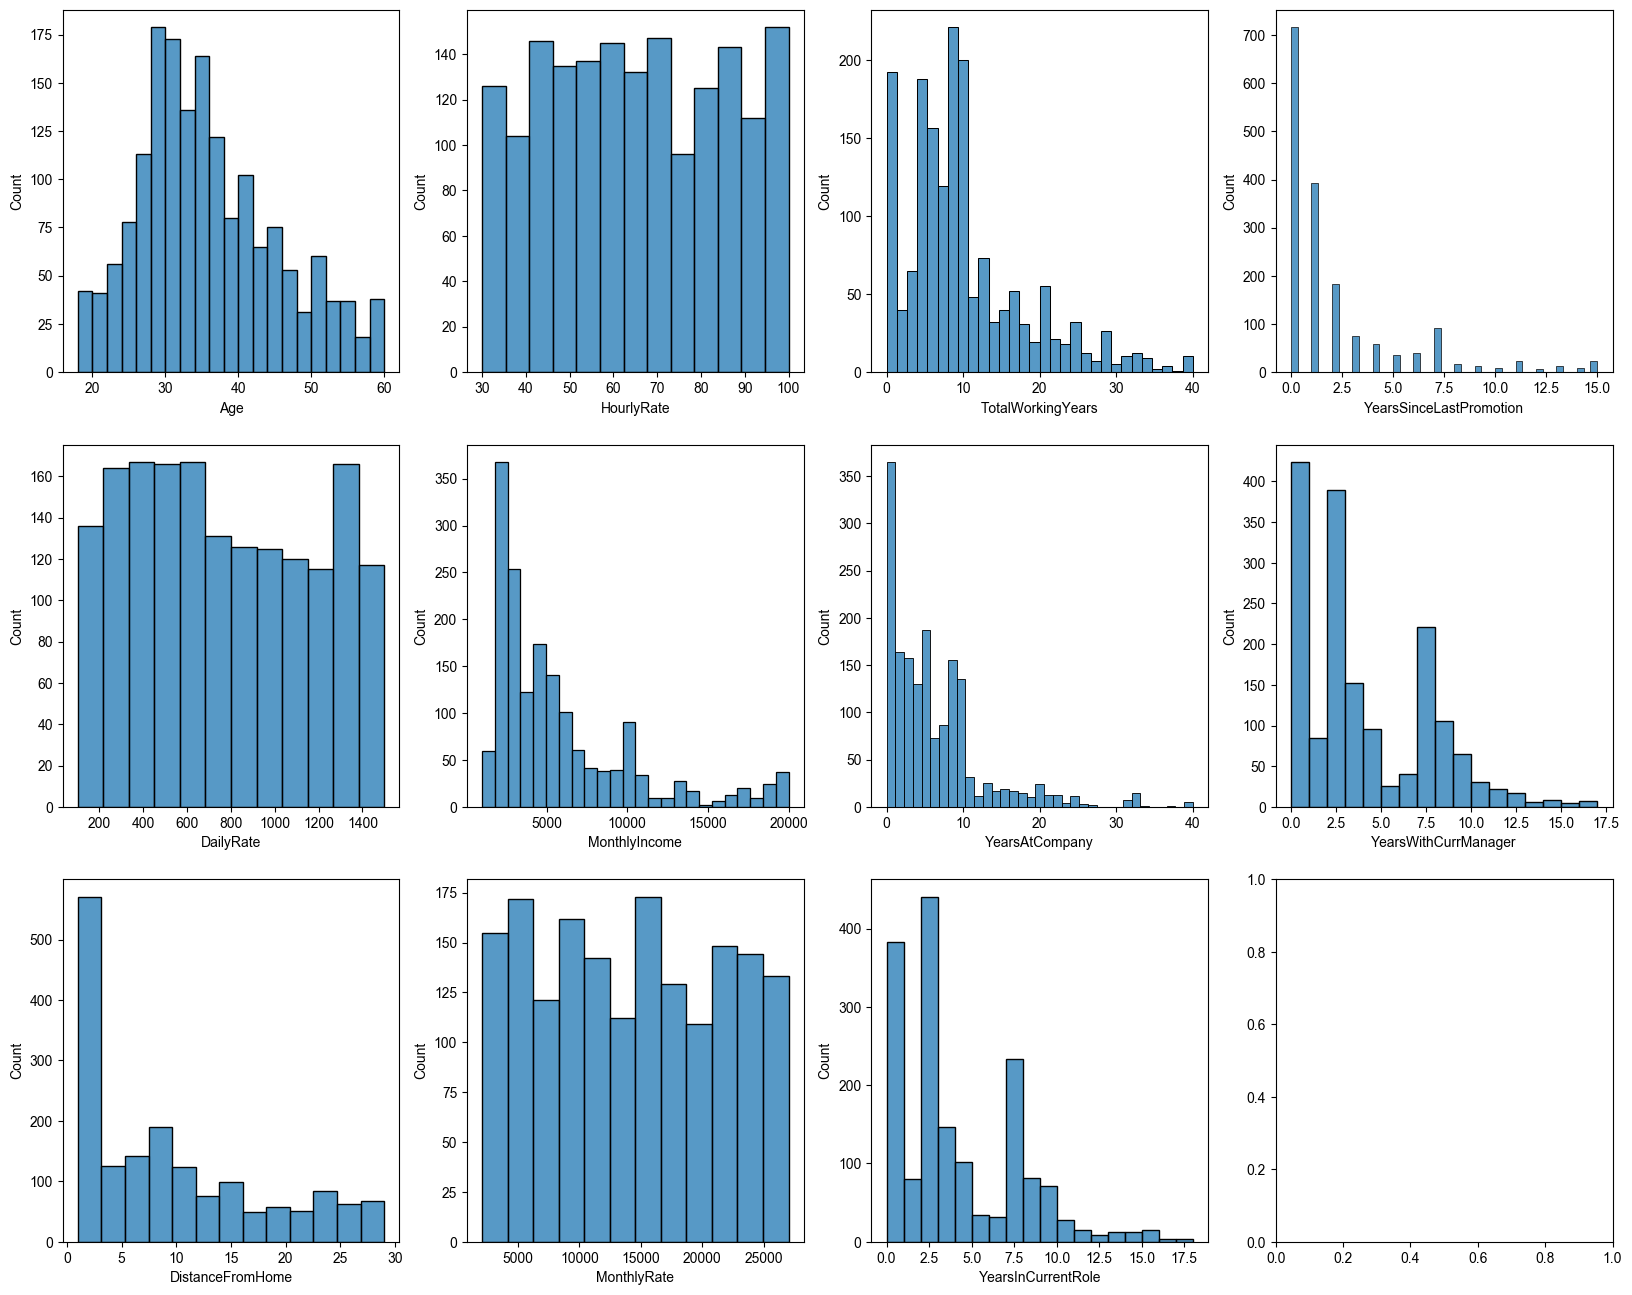

In [14]:
fig , axes = plt.subplots(nrows=3, ncols=4, figsize=(20,16))

for i , feature in enumerate(numerical_feature):
    sns.histplot(data=data, x=feature, ax= axes[i%3, i//3])

plt.show()

数据的分布都不太接近正态分布，因此考虑使用 robust 标准化

# 标准化

In [15]:
robust = RobustScaler()
robust.fit(data[numerical_feature])

data[numerical_feature] = robust.transform(data[numerical_feature])

# 适用性检验

In [16]:
df = data.drop(labels='Attrition', axis=1)

## KMO检验

KMO值介于0~1之间，越接近1，说明变量间相关性越强，偏相关性越弱，因子分析的效果越好。

若KMO值>0.6,说明变量间有相关性,则可因子分析

In [17]:
# KMO检验:计算KMO值
kmo_all,kmo_model = calculate_kmo(df)
kmo_all,kmo_model

(array([0.84204483, 0.46998588, 0.32262482, 0.48471887, 0.402598  ,
        0.77639502, 0.88451994, 0.37339214, 0.57586889, 0.76942866,
        0.52389893, 0.60846499, 0.61227038, 0.59344253, 0.60417414,
        0.52721318, 0.86317766, 0.52394338, 0.84110693, 0.89273247,
        0.91521544, 0.88845955]),
 np.float64(0.8127851037354403))

kmo 值达到了0.81 认为变量间存在较强的相关性

In [18]:
# calculate_kmo??

## Bartlett's 球状检验

若P值 < 0.05,则说明变量间有相关性,则可因子分析

In [19]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print("卡方值:",chi_square_value, "P值",p_value)

卡方值: 14215.126030552685 P值 0.0


# 特征选取

## 碎石图

Text(0, 0.5, 'Eigen Value')

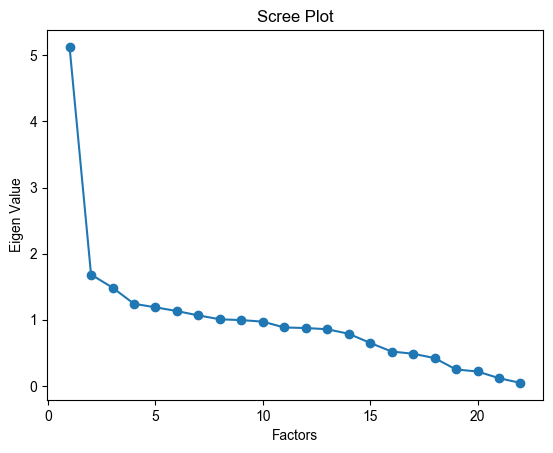

In [20]:
n = df.shape[1]
fa = FA(rotation = None,impute = "drop",n_factors=n)
fa.fit(df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,n+1),ev)

plt.plot(range(1,n+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')

In [21]:
ev

array([5.12650441, 1.68379513, 1.4858734 , 1.24126818, 1.18814001,
       1.13130963, 1.06556657, 1.00713527, 0.99463527, 0.97157928,
       0.88320359, 0.87498023, 0.85640697, 0.78801012, 0.64959165,
       0.51928095, 0.4860832 , 0.42023562, 0.24789064, 0.21750767,
       0.1163946 , 0.04460764])

选取特征值大于一的特征作为因子

初步选取 8 个因子

# 方差贡献率

In [22]:
fa = FA(n_factors=8,rotation='varimax')
fa.fit(df)
fa_load = pd.DataFrame(fa.loadings_,index=df.columns)

In [23]:
def highlight_max(s):
    # Get 10 largest values of the column
    is_large = s.nlargest(10).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

高光部分代表对每个因子前十个贡献最大的特征

In [24]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                    0    1    2    3    4    5    6    7
Variance         3.32 2.31 1.10 1.01 0.65 0.34 0.33 0.25
Proportional Var 0.15 0.10 0.05 0.05 0.03 0.02 0.02 0.01
Cumulative Var   0.15 0.26 0.31 0.35 0.38 0.40 0.41 0.42


# 因子得分

In [25]:
X = df.copy()
y = data['Attrition'].copy()
X.shape, y.shape

((1700, 22), (1700,))

In [26]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=8, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1700, 8)

每个样本的因子得分

In [27]:
X_transformed

array([[ 0.37004577, -1.04768119,  1.18332072, ...,  0.89164341,
         0.85946992,  0.06493826],
       [-0.87911315,  0.9256444 , -0.26218791, ..., -0.54562371,
         0.5077655 , -0.13839552],
       [ 0.10074443, -0.28042777, -0.73947782, ..., -0.68869904,
         0.60959554, -0.08295462],
       ...,
       [ 0.01044269,  2.26238037, -0.79254328, ..., -0.85276907,
        -0.10555207,  0.06393621],
       [ 0.82870244, -0.97722122,  0.98816272, ...,  0.49649843,
         0.75701366,  0.89643117],
       [ 1.62778524,  0.60055856,  0.14536852, ..., -1.73062917,
        -1.14688668,  0.56263062]], shape=(1700, 8))

# Logistic 模型

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,stratify=y,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 8), (340, 8), (1360,), (340,))

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       170
           1       0.66      0.68      0.67       170

    accuracy                           0.66       340
   macro avg       0.66      0.66      0.66       340
weighted avg       0.66      0.66      0.66       340



效果很一般，考虑更改因子个数

In [ ]:
# 经枚举，在选取 12 个因子时模型已经达到最优
# 选取 十二 个因子
transformer = FactorAnalysis(n_components=12, random_state=0)
X_transformed = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,stratify=y,random_state=100)

model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       170
           1       0.71      0.74      0.73       170

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340

